In [459]:
%reload_ext autoreload

In [460]:
%autoreload

In [461]:
import pandas as pd

In [462]:
df = pd.read_csv('housepricedata.csv')

In [463]:
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [464]:
dataset = df.values

In [465]:
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

In [466]:
inputs = dataset[:,0:10]

In [467]:
inputs

array([[ 8450,     7,     5, ...,     8,     0,   548],
       [ 9600,     6,     8, ...,     6,     1,   460],
       [11250,     7,     5, ...,     6,     1,   608],
       ...,
       [ 9042,     7,     9, ...,     9,     2,   252],
       [ 9717,     5,     6, ...,     5,     0,   240],
       [ 9937,     5,     6, ...,     6,     0,   276]])

In [468]:
labels = dataset[:,10]

In [469]:
labels

array([1, 1, 1, ..., 1, 0, 0])

In [470]:
from sklearn import preprocessing

In [471]:
min_max_scaler = preprocessing.MinMaxScaler()


In [472]:
inputs_scale = min_max_scaler.fit_transform(inputs)

In [473]:
inputs_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [474]:
from sklearn.model_selection import train_test_split

In [475]:
inputs_train, inputs_val_and_test, labels_train, labels_val_and_test = train_test_split(inputs_scale, labels, test_size=0.3)

In [476]:
inputs_val, inputs_test, labels_val, labels_test = train_test_split(inputs_val_and_test, labels_val_and_test, test_size=0.5)

In [477]:
print(inputs_train.shape, inputs_val.shape, inputs_test.shape, labels_train.shape, labels_val.shape, labels_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [478]:
from keras.models import Sequential
from keras.layers import Dense

In [479]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [480]:
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [481]:
hist = model.fit(inputs_train, labels_train, batch_size=32, epochs=100, validation_data=(inputs_val, labels_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 1s 532us/step - loss: 0.6942 - accuracy: 0.4980 - val_loss: 0.6915 - val_accuracy: 0.4886
Epoch 2/100
1022/1022 [==============================] - 0s 57us/step - loss: 0.6903 - accuracy: 0.5068 - val_loss: 0.6882 - val_accuracy: 0.5023
Epoch 3/100
1022/1022 [==============================] - 0s 54us/step - loss: 0.6877 - accuracy: 0.5734 - val_loss: 0.6857 - val_accuracy: 0.6256
Epoch 4/100
1022/1022 [==============================] - 0s 56us/step - loss: 0.6857 - accuracy: 0.6712 - val_loss: 0.6837 - val_accuracy: 0.7534
Epoch 5/100
1022/1022 [==============================] - 0s 48us/step - loss: 0.6839 - accuracy: 0.7701 - val_loss: 0.6819 - val_accuracy: 0.8174
Epoch 6/100
1022/1022 [==============================] - 0s 57us/step - loss: 0.6824 - accuracy: 0.7769 - val_loss: 0.6802 - val_accuracy: 0.8219
Epoch 7/100
1022/1022 [==============================] - 0s 61us/step - loss

1022/1022 [==============================] - 0s 54us/step - loss: 0.4144 - accuracy: 0.8591 - val_loss: 0.3913 - val_accuracy: 0.8858
Epoch 57/100
1022/1022 [==============================] - 0s 51us/step - loss: 0.4078 - accuracy: 0.8630 - val_loss: 0.3853 - val_accuracy: 0.8904
Epoch 58/100
1022/1022 [==============================] - 0s 50us/step - loss: 0.4022 - accuracy: 0.8581 - val_loss: 0.3770 - val_accuracy: 0.8858
Epoch 59/100
1022/1022 [==============================] - 0s 50us/step - loss: 0.3961 - accuracy: 0.8640 - val_loss: 0.3717 - val_accuracy: 0.8858
Epoch 60/100
1022/1022 [==============================] - 0s 48us/step - loss: 0.3913 - accuracy: 0.8601 - val_loss: 0.3646 - val_accuracy: 0.8858
Epoch 61/100
1022/1022 [==============================] - 0s 50us/step - loss: 0.3861 - accuracy: 0.8571 - val_loss: 0.3580 - val_accuracy: 0.8858
Epoch 62/100
1022/1022 [==============================] - 0s 56us/step - loss: 0.3809 - accuracy: 0.8591 - val_loss: 0.3526 - val_a

In [482]:
model.evaluate(inputs_test, labels_test)

219/219 [==============================] - 0s 24us/step


[0.3005364079997964, 0.8949771523475647]

In [483]:
import matplotlib.pyplot as plt

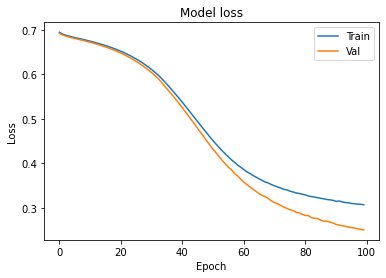

In [484]:
# Training loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

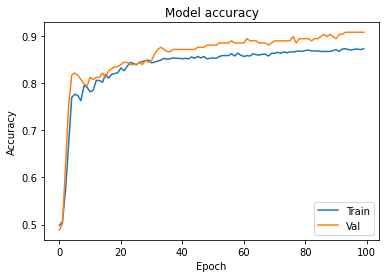

In [485]:
# Training accuracy and validation accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [486]:
# Overfitted model
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

hist_2 = model_2.fit(inputs_train, labels_train, batch_size=32, epochs=100, validation_data=(inputs_val, labels_val))


Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.4995 - accuracy: 0.7622 - val_loss: 0.3232 - val_accuracy: 0.8265
Epoch 2/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.3786 - accuracy: 0.8366 - val_loss: 0.3070 - val_accuracy: 0.8904
Epoch 3/100
1022/1022 [==============================] - 1s 990us/step - loss: 0.3142 - accuracy: 0.8806 - val_loss: 0.2276 - val_accuracy: 0.8950
Epoch 4/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.3056 - accuracy: 0.8699 - val_loss: 0.2380 - val_accuracy: 0.9132
Epoch 5/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.2729 - accuracy: 0.8816 - val_loss: 0.2118 - val_accuracy: 0.9178
Epoch 6/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.2703 - accuracy: 0.8777 - val_loss: 0.2600 - val_accuracy: 0.9132
Epoch 7/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.25

Epoch 57/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.1564 - accuracy: 0.9295 - val_loss: 0.2987 - val_accuracy: 0.8950
Epoch 58/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.1651 - accuracy: 0.9305 - val_loss: 0.2101 - val_accuracy: 0.9178
Epoch 59/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.1625 - accuracy: 0.9325 - val_loss: 0.3413 - val_accuracy: 0.9132
Epoch 60/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.1670 - accuracy: 0.9256 - val_loss: 0.6752 - val_accuracy: 0.8402
Epoch 61/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.1835 - accuracy: 0.9217 - val_loss: 0.2270 - val_accuracy: 0.9224
Epoch 62/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.1730 - accuracy: 0.9266 - val_loss: 0.2319 - val_accuracy: 0.9087
Epoch 63/100
1022/1022 [==============================] - 1s 1ms/step - loss: 0.1535 - accuracy: 0.9374 - val_loss: 0.4056 -

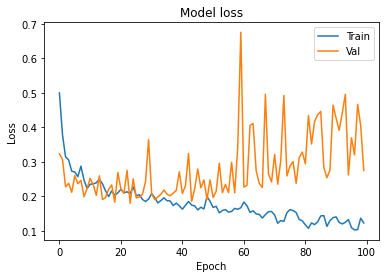

In [487]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

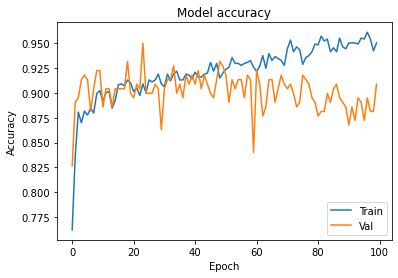

In [488]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [489]:
from keras.layers import Dropout
from keras import regularizers

In [490]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist_3 = model_3.fit(inputs_train, labels_train,
          batch_size=32, epochs=100,
          validation_data=(inputs_val, labels_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 3s 3ms/step - loss: 14.2442 - accuracy: 0.5724 - val_loss: 3.9021 - val_accuracy: 0.8219
Epoch 2/100
1022/1022 [==============================] - 2s 2ms/step - loss: 1.6827 - accuracy: 0.8200 - val_loss: 0.6675 - val_accuracy: 0.8493
Epoch 3/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.5729 - accuracy: 0.8571 - val_loss: 0.4769 - val_accuracy: 0.8904
Epoch 4/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.5272 - accuracy: 0.8454 - val_loss: 0.4276 - val_accuracy: 0.9041
Epoch 5/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.5080 - accuracy: 0.8591 - val_loss: 0.4695 - val_accuracy: 0.8858
Epoch 6/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.5053 - accuracy: 0.8620 - val_loss: 0.4270 - val_accuracy: 0.8950
Epoch 7/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.496

Epoch 57/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.4438 - accuracy: 0.8699 - val_loss: 0.3724 - val_accuracy: 0.9178
Epoch 58/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.4438 - accuracy: 0.8708 - val_loss: 0.3665 - val_accuracy: 0.9269
Epoch 59/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.4357 - accuracy: 0.8767 - val_loss: 0.3922 - val_accuracy: 0.9087
Epoch 60/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.4566 - accuracy: 0.8659 - val_loss: 0.3834 - val_accuracy: 0.9041
Epoch 61/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.4321 - accuracy: 0.8787 - val_loss: 0.3803 - val_accuracy: 0.9132
Epoch 62/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.4489 - accuracy: 0.8777 - val_loss: 0.3710 - val_accuracy: 0.9224
Epoch 63/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.4454 - accuracy: 0.8699 - val_loss: 0.3674 -

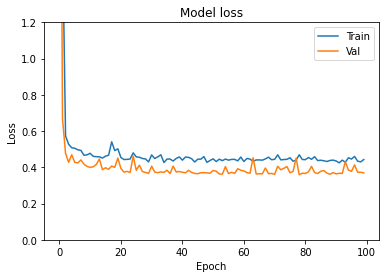

In [491]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

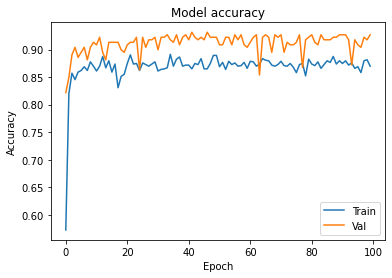

In [492]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()